# ¿Qué plan telefónico es más redituable?

La compañía telefónica Megaline ofrece dos planes a sus clientes, Surf y Ultimate. Queremos saber cual de los dos planes genera más ingresos para poder tomar decisiones comerciales más informadas. Analizaremos los datos y comentaremos como se distribuye el ingreso por usuario.

## Preparar los datos

### Inicialización de datos

Importaremos el paquete _pandas_ para hacer el trabajo con los datos, el _numpy_ para poder hacer cálculos matemáticos más fáciles, _scipy.stats_ para hacer algunas operaciones estadísticas, _re_ para trabajar con expresiones regulares (muy útil posteriormente), y _matplotlib.pyplot_ para graficar mejor.

In [94]:
import pandas as pd
import numpy as np
import scipy.stats as st
import re

import matplotlib.pyplot as plt

#### Cargar datos

Tenemos cinco tablas que analizar: `users`, la cual tiene información sobre los usuarios de telefonía; `calls`, tabla de las llamadas individuales; `internet`, con datos de los megas utilizados por los usuarios; `messages`, que versa sobre los mensajes enviados; y `plans`, que detalla los costos que existen en los dos planes de la compañía. Se muestra a continuación un diagrama relacional que ayuda a entender como se hallan las tablas interconectadas entre ellas. Ahora, las cargaremos.

<div>
<img src="attachment:database_diagram.png" width="500"/>
</div>

In [95]:
# Crearemos una variable para cada una de las cinco tablas.

df_calls_og = pd.read_csv("/datasets/megaline_calls.csv")
df_internet_og = pd.read_csv("/datasets/megaline_internet.csv")
df_users_og = pd.read_csv("/datasets/megaline_users.csv")
df_messages_og = pd.read_csv("/datasets/megaline_messages.csv")
df_plans_og = pd.read_csv("/datasets/megaline_plans.csv")

#### Explorar datos
Necesitamos ahora echar un vistazo a cada una de ellas. Para cada una mostremos un sample aleatorio y el info.

In [96]:
for table in ["df_calls_og", "df_internet_og", "df_users_og", "df_messages_og", "df_plans_og"]:
    
    # Mostramos la info necesaria
    print(table)
    
    # Para evitar error si nuestra tabla es pequeña
    if len(locals()[table]) >= 10:
        display(locals()[table].sample(n= 10, random_state=1))
    else:
        display(locals()[table])
    
    locals()[table].info()
    
    print("-"*20)
        

#table_calls_original.info()


df_calls_og


,id,user_id,call_date,duration
106231,1374_327,1374,2018-12-17,1.17
109017,1385_87,1385,2018-10-20,14.02
76096,1268_600,1268,2018-09-24,12.21
106317,1375_219,1375,2018-12-03,7.03
98706,1354_6,1354,2018-10-16,6.21
50517,1182_90,1182,2018-11-18,1.96
13355,1057_234,1057,2018-10-03,0.00
50255,1181_604,1181,2018-12-28,11.65
129376,1465_773,1465,2018-07-27,12.75
51887,1187_80,1187,2018-12-22,14.22


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
--------------------
df_internet_og


,id,user_id,session_date,mb_used
13106,1062_76,1062,2018-09-15,225.79
70950,1331_201,1331,2018-09-28,169.69
6195,1035_43,1035,2018-12-27,124.84
2400,1011_140,1011,2018-06-26,0.00
25926,1121_19,1121,2018-12-16,504.92
63187,1291_312,1291,2018-07-08,289.98
16908,1077_28,1077,2018-12-12,465.72
64323,1295_223,1295,2018-12-20,549.30
95470,1445_118,1445,2018-08-13,405.50
55326,1251_137,1251,2018-12-18,285.50


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
--------------------
df_users_og


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
304,1304,Dominque,Cole,69,"Birmingham-Hoover, AL MSA",2018-10-28,ultimate,NaN
340,1340,Vanna,Stanton,65,"Dallas-Fort Worth-Arlington, TX MSA",2018-07-05,surf,NaN
47,1047,Yuk,French,22,"Indianapolis-Carmel-Anderson, IN MSA",2018-06-16,ultimate,NaN
67,1067,Robt,Allen,37,"Grand Rapids-Kentwood, MI MSA",2018-09-24,surf,2018-11-24
479,1479,Keesha,Burnett,44,"Riverside-San Bernardino-Ontario, CA MSA",2018-11-12,surf,NaN
485,1485,Damion,Woodard,67,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",2018-08-21,surf,NaN
310,1310,Vincent,Fry,73,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-11-29,surf,NaN
31,1031,Lane,Martin,52,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-15,ultimate,NaN
249,1249,Kelly,Goodman,41,"Cincinnati, OH-KY-IN MSA",2018-05-14,ultimate,NaN
90,1090,Brock,Skinner,30,"Indianapolis-Carmel-Anderson, IN MSA",2018-05-12,surf,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
--------------------
df_messages_og


,id,user_id,message_date
12922,1084_162,1084,2018-11-17
55949,1354_99,1354,2018-10-04
19111,1123_180,1123,2018-11-04
46123,1314_11,1314,2018-12-15
72141,1467_473,1467,2018-05-18
58237,1369_38,1369,2018-12-15
55621,1349_433,1349,2018-10-11
18826,1122_55,1122,2018-07-13
64105,1408_230,1408,2018-06-05
6990,1057_314,1057,2018-11-18


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
--------------------
df_plans_og


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
--------------------


Podemos notar que no tenemos valores nulos (a exepción de `churn_date` que no siempre debe existir), lo cual es buena señal. Los datos se ven bien normalitos, pero no podemos saber si hay duplicados, para eso tendremos que usar `duplicated`.

In [97]:
# Lo hacemos separado porque son ligeramente diferentes: no consideramos los planes porque solo son dos.

for table in ["df_calls_og", "df_internet_og", "df_messages_og"]:
    
    print(table)
    display(
        locals()[table].duplicated("id").value_counts()
    )
    
    print("-"*20)
        
print("df_users_og")
display(
    df_users_og.duplicated("user_id").value_counts()
)
    
print("-"*20)

#table_calls_original.info()


df_calls_og


False    137735
dtype: int64

--------------------
df_internet_og


False    104825
dtype: int64

--------------------
df_messages_og


False    76051
dtype: int64

--------------------
df_users_og


False    500
dtype: int64

--------------------


Podemos igual notar que no existen valores duplicados, lo cual nos permite concluir que no hay necesidad de hacer una limpieza adicional en este aspecto. Del paso anterior se observa que es necesario sin embargo cambiar el tipo de dato de algunas de las columnas de las tablas y luego unirlas para tener una sola.

### Cambiar tipos de datos

Hagamos el cambio de los datos de fecha en las tablas a el formato apropiado.

In [98]:
# Cambiemos los tipos de datos de las tablas.

df_calls_og = df_calls_og.astype({"call_date":'datetime64[ns]'})

df_internet_og = df_internet_og.astype({"session_date":'datetime64[ns]'})

df_users_og = df_users_og.astype({"reg_date":'datetime64[ns]', "churn_date":'datetime64[ns]'})

df_messages_og = df_messages_og.astype({"message_date":'datetime64[ns]'})

Mostremos los datos para poder ver que todo anda bien.

In [99]:
# Mostremos ahora la info para ver si los tipos han cambiado.


df_calls_og.info()
print()
print("-"*20)

df_internet_og.info()
print()
print("-"*20)

df_users_og.info()
print()
print("-"*20)

df_messages_og.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB

--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB

-

Se ve todo bien, podemos notar que no hay que cambiar más información en este punto. Para poder continuar tenemos que juntarlas en una sola, pero de la manera en que se manejan actualmente (individualmente, pudiendo tener múltiples entradas por usuario único) resultaría un poco complicado por lo que tendremos que enriquecer un poco la información primero.

Para continuar haremos lo siguiente, en las tablas de llamadas e internet aplicaremos las reglas para redondear el servicio (de minuto y de gigabytes) en una columna nueva; aplicaremos pivot_table para obtener una tabla con la suma de la información relativa a cada usuario (de minutos y llamadas) y uniremos esto con la tabla de usuarios: así tendremos la información de cuanto consumió cada usuario. Posteriormente agregaremos el número de mensajes enviados y la información del plan contratado por el usuario para poder usar después.

### Redondear y sumar I

Empecemos con la tabla de llamadas, cree una nueva columna que indique cuantos minutos deben de cobrarse al usuario. De aquí en adelante usaremos unas copias de las tablas originales, en la que iremos haciendo nuestros cambios.

In [100]:
# Redondeo de llamadas

df_calls = df_calls_og.copy()

df_calls["duration_rounded"] = df_calls.duration.apply(np.ceil)

df_calls.sample(n=10, random_state=1)


,id,user_id,call_date,duration,duration_rounded
106231,1374_327,1374,2018-12-17,1.17,2.0
109017,1385_87,1385,2018-10-20,14.02,15.0
76096,1268_600,1268,2018-09-24,12.21,13.0
106317,1375_219,1375,2018-12-03,7.03,8.0
98706,1354_6,1354,2018-10-16,6.21,7.0
50517,1182_90,1182,2018-11-18,1.96,2.0
13355,1057_234,1057,2018-10-03,0.00,0.0
50255,1181_604,1181,2018-12-28,11.65,12.0
129376,1465_773,1465,2018-07-27,12.75,13.0
51887,1187_80,1187,2018-12-22,14.22,15.0


Todo se ve muy bien, pero recordemos que tenemos todo el periodo de un año así que agreguemos una columna _month_ para poder irlo distribuyendo ordenadamente.

In [101]:
df_calls["month"] = df_calls.call_date.dt.month

df_calls.sample(n=10, random_state=1)

,id,user_id,call_date,duration,duration_rounded,month
106231,1374_327,1374,2018-12-17,1.17,2.0,12
109017,1385_87,1385,2018-10-20,14.02,15.0,10
76096,1268_600,1268,2018-09-24,12.21,13.0,9
106317,1375_219,1375,2018-12-03,7.03,8.0,12
98706,1354_6,1354,2018-10-16,6.21,7.0,10
50517,1182_90,1182,2018-11-18,1.96,2.0,11
13355,1057_234,1057,2018-10-03,0.00,0.0,10
50255,1181_604,1181,2018-12-28,11.65,12.0,12
129376,1465_773,1465,2018-07-27,12.75,13.0,7
51887,1187_80,1187,2018-12-22,14.22,15.0,12


Podemos sumar todo por usuario en una tabla pivote, ordenando por mes.

In [102]:
# Juntemos en una tabla pivote
df_calls_pivot = df_calls.pivot_table(index="user_id", columns= "month", values="duration_rounded", aggfunc="sum")

df_calls_pivot.sample(n=10, random_state=1)

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN
1296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,295.0,369.0
1035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,627.0
1416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,362.0,391.0,398.0
1449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,368.0,291.0,210.0
1381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179.0,502.0,472.0,514.0
1365,NaN,NaN,NaN,NaN,NaN,285.0,1082.0,1102.0,1131.0,1227.0,1099.0,1357.0
1067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,470.0,413.0,344.0
1261,NaN,56.0,304.0,502.0,533.0,441.0,513.0,479.0,627.0,601.0,562.0,579.0


Ya tenemos el pivote de los minutos, pero necesitamos también el conteo, es un proceso similar pero tenemos que primero ver que sucede con las llamadas de duración cero: analicemos rápidamente cuántas son en proporción del total.

#### Llamadas de duración cero

In [103]:
df_calls.query("duration == 0.0").count()

id                  26834
user_id             26834
call_date           26834
duration            26834
duration_rounded    26834
month               26834
dtype: int64

Tenemos 26834 de 137735 llamadas, lo cual representa ~20% del total: no es poca cosa. La decisión de removerlas depende de si afectan al costo: como no es el caso porque su duración no se cuenta, las removeremos.

### Redondear y sumar II

Continuemos con el proceso, pero ahora removamos esas llamadas de duración cero.

In [104]:
# Pivote de conteo de llamadas
df_calls_pivot_count = (
    df_calls.query("duration > 0.0").
    pivot_table(index="user_id", columns= "month", values="duration_rounded", aggfunc="count")
)

df_calls_pivot_count.sample(n=10, random_state=1)


month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
1296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,35.0,43.0
1035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0
1416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,45.0,43.0
1449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,32.0,26.0
1381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,50.0,47.0,57.0
1365,NaN,NaN,NaN,NaN,NaN,29.0,125.0,123.0,121.0,133.0,123.0,147.0
1067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,49.0,50.0,38.0
1261,NaN,7.0,37.0,57.0,54.0,50.0,61.0,56.0,66.0,67.0,60.0,64.0


Hagamos lo mismo pero para los gigabytes de internet. Aquí no trabajaremos sobre la tabla de internet, sino que sumaremos los valores de megabytes directamente con una tabla pivote (ya que lo que necesitamos es el total por mes).

In [105]:
# Redondeo de internet

df_internet = df_internet_og.copy()
df_internet["month"] = df_internet.session_date.dt.month

df_internet_pivot = df_internet.pivot_table(index="user_id", columns="month", values="mb_used", aggfunc="sum")

# Tabla sin redondear
print("original")
display(
    df_internet_pivot.sample(n=10, random_state=1)
)

# Tabla redondeada
print("-"*40)
print("redondeada")
df_internet_pivot = df_internet_pivot.apply(lambda x: np.ceil(x / 1024), axis=1)
df_internet_pivot.sample(n=10, random_state=1)

original


month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1466,NaN,NaN,NaN,NaN,7127.48,12559.35,19761.29,14284.36,17916.48,14944.62,13191.03,11303.25
1108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,233.17
1168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7322.85
1200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4134.23,15437.14
1454,NaN,NaN,NaN,NaN,NaN,NaN,5262.10,23053.98,23703.57,23455.56,13340.98,22246.47
1167,NaN,NaN,NaN,NaN,3367.18,15091.52,12309.02,8734.55,13276.26,16142.29,13312.88,13003.48
1468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11179.41,18878.46,18506.90,11986.52
1176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12453.30,28528.76,25808.24
1035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15500.04


----------------------------------------
redondeada


month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1466,NaN,NaN,NaN,NaN,7.0,13.0,20.0,14.0,18.0,15.0,13.0,12.0
1108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
1200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,16.0
1454,NaN,NaN,NaN,NaN,NaN,NaN,6.0,23.0,24.0,23.0,14.0,22.0
1167,NaN,NaN,NaN,NaN,4.0,15.0,13.0,9.0,13.0,16.0,14.0,13.0
1468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,19.0,19.0,12.0
1176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,28.0,26.0
1035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0


Perfecto, tenemos la información en dos tablas pivotes que nos ayudaran a calcular el gasto de cada usuario por mes. Solo nos falta la información relativa a los mensajes, vayamos a ello.

In [106]:
# Agreguemos el mes

df_messages = df_messages_og.copy()

df_messages["month"] = df_messages.message_date.dt.month

df_messages.sample(n=10, random_state=1)

,id,user_id,message_date,month
12922,1084_162,1084,2018-11-17,11
55949,1354_99,1354,2018-10-04,10
19111,1123_180,1123,2018-11-04,11
46123,1314_11,1314,2018-12-15,12
72141,1467_473,1467,2018-05-18,5
58237,1369_38,1369,2018-12-15,12
55621,1349_433,1349,2018-10-11,10
18826,1122_55,1122,2018-07-13,7
64105,1408_230,1408,2018-06-05,6
6990,1057_314,1057,2018-11-18,11


Todo se ve bien, contemos para obtener nuestra tabla pivote

In [107]:
df_messages_pivot = df_messages.pivot_table(index="user_id", values="id", columns="month", aggfunc="count")

# Mostremos para ver que todo esta en órden
df_messages_pivot.sample(n=10, random_state=1)

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,71.0,72.0,61.0,67.0
1372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0
1496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,21.0,18.0,13.0,11.0
1144,NaN,NaN,NaN,21.0,73.0,64.0,64.0,86.0,74.0,72.0,66.0,81.0
1100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,45.0,64.0,47.0,73.0
1248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,102.0
1481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1334,NaN,NaN,1.0,14.0,9.0,12.0,18.0,14.0,15.0,17.0,13.0,17.0
1036,NaN,NaN,NaN,NaN,NaN,19.0,63.0,77.0,83.0,75.0,76.0,45.0


Recapitulando: tenemos ahora cuatro tablas pivotes que corresponden a los consumos de llamadas(y el conteo), internet y megas, lo relacionaremos con el plan y podremos saber cuanto gastan los usuarios al mes.

### Juntar las tablas en una sola

Ya que tenemos los valores en las tablas pivotes podemos juntar estos valores en una sola que acumule todos estos valores: para poder distinguir las columnas de mes por cada tipo de consumo, usaremos prefijos.

In [108]:
# Agregando el total de llamadas -minutos-
df_aggregate = df_users_og.join(df_calls_pivot.add_prefix("calls_pivot_"), on="user_id")

# Total de número de llamdas
df_aggregate = df_aggregate.join(df_calls_pivot_count.add_prefix("calls_count_pivot_"), on="user_id")

# Total de internet
df_aggregate = df_aggregate.join(df_internet_pivot.add_prefix("internet_pivot_"), on="user_id")

# Total de número de mensajes
df_aggregate = df_aggregate.join(df_messages_pivot.add_prefix("messages_pivot_"), on="user_id")

# Mostremos un sample
df_aggregate.sample(n=10, random_state=1)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,calls_pivot_1,calls_pivot_2,...,messages_pivot_3,messages_pivot_4,messages_pivot_5,messages_pivot_6,messages_pivot_7,messages_pivot_8,messages_pivot_9,messages_pivot_10,messages_pivot_11,messages_pivot_12
304,1304,Dominque,Cole,69,"Birmingham-Hoover, AL MSA",2018-10-28,ultimate,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,65.0,59.0
340,1340,Vanna,Stanton,65,"Dallas-Fort Worth-Arlington, TX MSA",2018-07-05,surf,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.0,65.0,62.0,49.0,66.0
47,1047,Yuk,French,22,"Indianapolis-Carmel-Anderson, IN MSA",2018-06-16,ultimate,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
67,1067,Robt,Allen,37,"Grand Rapids-Kentwood, MI MSA",2018-09-24,surf,2018-11-24,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,11.0,29.0,39.0,20.0
479,1479,Keesha,Burnett,44,"Riverside-San Bernardino-Ontario, CA MSA",2018-11-12,surf,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
485,1485,Damion,Woodard,67,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",2018-08-21,surf,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0
310,1310,Vincent,Fry,73,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-11-29,surf,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,1031,Lane,Martin,52,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-15,ultimate,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,2.0,3.0,2.0,1.0,5.0
249,1249,Kelly,Goodman,41,"Cincinnati, OH-KY-IN MSA",2018-05-14,ultimate,NaT,NaN,NaN,...,NaN,NaN,19.0,32.0,26.0,39.0,47.0,36.0,NaN,NaN
90,1090,Brock,Skinner,30,"Indianapolis-Carmel-Anderson, IN MSA",2018-05-12,surf,NaT,NaN,NaN,...,NaN,NaN,19.0,27.0,24.0,22.0,21.0,21.0,24.0,31.0


Todo se ve bien, tenemos los valores a nivel de usuario para los doce meses del periodo: no necesitaremos tener la información tan granulada porque necesitamos los estadísticos por periodo, pero de momento nos servirá para ir trabajando.

### Agregar valores del costo por mes

De la muestra de datos justamente anterior podemos observar que hay muchos NaN: la razón es que a veces el usuario no estaba en el mes dado. Sin embargo, ¿qué sucede si no se uso un servicio en un mes? igual tenemos un NaN aunque no debería ser el caso: si un usuario no manda un sms en junio deberíamos tener cero en vez de NaN, pero si entró en julio entonces si deberíamos tener NaN (algo similar pasa si canceló el plan). Posterior a eso ya podremos calcular propiamente los valores del costo.

#### Reemplazar los NaN con cero donde es necesario

Para continuar, tendremos que dividir este proceso en dos tablas similares, pero esencialmente distintas: si un usuario entra o sale en los últimos días del mes, ya no usará su plan todo el mes (estará menos días cubierto por el plan) entonces alteraría significativamente la manera en que se cobrará. Nuestro caso ideal sería que estuviera **todo el mes**, pero no siempre es el caso; tendremos dos tablas, una donde se reemplacen los NaN **solo si estuvo todo el mes** y otra donde solo es necesario que haya estado **al menos un día**.

In [109]:
# Creamos una copia para trabajar
df_aggregate_whole_month = df_aggregate.copy()

# Solo queremos columnas que hablen de los meses
columns_months = list(df_aggregate.columns)[8:]

for index, row in df_aggregate_whole_month.iterrows():
    
    # la cota inferior
    if row["reg_date"].day == 1:
        current_lower_bound = row["reg_date"].month
    else:
        current_lower_bound = row["reg_date"].month + 1

    # la cota superior
    if np.isnan(row["churn_date"].day):
        current_upper_bound = 13    
    elif row["churn_date"].day == pd.Period(row["reg_date"], freq='H').days_in_month:
        current_upper_bound = row["churn_date"].month
    else:
        current_upper_bound = row["churn_date"].month -1
    
    # El rango de números que podemos y no podemos tener, en str para usar regex
    valid_months_range = list(str(x) for x in (range(current_lower_bound, current_upper_bound+1)))
    invalid_months_range = list(        
        str(y) for y in [x for x in list(range(1,13)) if x not in (range(current_lower_bound, current_upper_bound+1))]
    )
        
    # Las columnas de meses válidos
    valid_months_columns = [
        column for column in columns_months if any(bool(re.search("_"+value+"$", column)) for value in valid_months_range)
    ]
    
    # Las columnas de meses válidos
    invalid_months_columns = [
        column for column in columns_months if any(bool(re.search("_"+value+"$", column)) for value in invalid_months_range)
    ]
    
    # Tenemos los meses, se hacen dos cosas: para los meses no válidos se cambian los valores por NaN;
    # para los SÍ válidos se coloca cero si es NaN, no se hace nada si ya hay valor (esto es correcto)
    
    # Primero los inválidos ya que es más rápido,
    df_aggregate_whole_month.loc[index, invalid_months_columns] = np.nan
    
    # Ahora los válidos:
    for column in valid_months_columns:
        if np.isnan(df_aggregate_whole_month.loc[index, column]):
            df_aggregate_whole_month.loc[index, column] = 0
    

Hemos hecho el cambio para los valores del mes completo, echemosle un ojo para ver como quedan:

In [110]:
df_aggregate_whole_month.sample(n=10, random_state=1)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,calls_pivot_1,calls_pivot_2,...,messages_pivot_3,messages_pivot_4,messages_pivot_5,messages_pivot_6,messages_pivot_7,messages_pivot_8,messages_pivot_9,messages_pivot_10,messages_pivot_11,messages_pivot_12
304,1304,Dominque,Cole,69,"Birmingham-Hoover, AL MSA",2018-10-28,ultimate,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0,59.0
340,1340,Vanna,Stanton,65,"Dallas-Fort Worth-Arlington, TX MSA",2018-07-05,surf,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.0,65.0,62.0,49.0,66.0
47,1047,Yuk,French,22,"Indianapolis-Carmel-Anderson, IN MSA",2018-06-16,ultimate,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,7.0
67,1067,Robt,Allen,37,"Grand Rapids-Kentwood, MI MSA",2018-09-24,surf,2018-11-24,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,NaN
479,1479,Keesha,Burnett,44,"Riverside-San Bernardino-Ontario, CA MSA",2018-11-12,surf,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
485,1485,Damion,Woodard,67,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",2018-08-21,surf,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,24.0
310,1310,Vincent,Fry,73,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-11-29,surf,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
31,1031,Lane,Martin,52,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-15,ultimate,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,3.0,2.0,1.0,5.0
249,1249,Kelly,Goodman,41,"Cincinnati, OH-KY-IN MSA",2018-05-14,ultimate,NaT,NaN,NaN,...,NaN,NaN,NaN,32.0,26.0,39.0,47.0,36.0,0.0,0.0
90,1090,Brock,Skinner,30,"Indianapolis-Carmel-Anderson, IN MSA",2018-05-12,surf,NaT,NaN,NaN,...,NaN,NaN,NaN,27.0,24.0,22.0,21.0,21.0,24.0,31.0


Se ve bastante bien, hagamos lo mismo para los valores incompletos.

In [111]:
# Creamos una copia para trabajar
df_aggregate_fraction_month = df_aggregate.copy()

# Solo queremos columnas que hablen de los meses
columns_months = list(df_aggregate.columns)[8:]

for index, row in df_aggregate_fraction_month.iterrows():
    
    # la cota inferior
    current_lower_bound = row["reg_date"].month

    # la cota superior
    if np.isnan(row["churn_date"].month):
        current_upper_bound = 13    
    else:
        current_upper_bound = row["churn_date"].month
    
    # El rango de números que podemos y no podemos tener, en str para usar regex
    valid_months_range = list(str(x) for x in (range(current_lower_bound, current_upper_bound+1)))
    invalid_months_range = list(        
        str(y) for y in [x for x in list(range(1,13)) if x not in (range(current_lower_bound, current_upper_bound+1))]
    )
        
    # Las columnas de meses válidos
    valid_months_columns = [
        column for column in columns_months if any(bool(re.search("_"+value+"$", column)) for value in valid_months_range)
    ]
    
    # Las columnas de meses válidos
    invalid_months_columns = [
        column for column in columns_months if any(bool(re.search("_"+value+"$", column)) for value in invalid_months_range)
    ]
    
    # Tenemos los meses, se hacen dos cosas: para los meses no válidos se cambian los valores por NaN;
    # para los SÍ válidos se coloca cero si es NaN, no se hace nada si ya hay valor (esto es correcto)
    
    # Primero los inválidos ya que es más rápido,
    df_aggregate_fraction_month.loc[index, invalid_months_columns] = np.nan
    
    # Ahora los válidos:
    for column in valid_months_columns:
        if np.isnan(df_aggregate_fraction_month.loc[index, column]):
            df_aggregate_fraction_month.loc[index, column] = 0
    

Ahora veamos que pasa con la tabla para días de fracciones.

In [112]:
df_aggregate_fraction_month.sample(n=10, random_state=1)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,calls_pivot_1,calls_pivot_2,...,messages_pivot_3,messages_pivot_4,messages_pivot_5,messages_pivot_6,messages_pivot_7,messages_pivot_8,messages_pivot_9,messages_pivot_10,messages_pivot_11,messages_pivot_12
304,1304,Dominque,Cole,69,"Birmingham-Hoover, AL MSA",2018-10-28,ultimate,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,65.0,59.0
340,1340,Vanna,Stanton,65,"Dallas-Fort Worth-Arlington, TX MSA",2018-07-05,surf,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,8.0,65.0,62.0,49.0,66.0
47,1047,Yuk,French,22,"Indianapolis-Carmel-Anderson, IN MSA",2018-06-16,ultimate,NaT,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,7.0
67,1067,Robt,Allen,37,"Grand Rapids-Kentwood, MI MSA",2018-09-24,surf,2018-11-24,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,11.0,29.0,39.0,NaN
479,1479,Keesha,Burnett,44,"Riverside-San Bernardino-Ontario, CA MSA",2018-11-12,surf,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
485,1485,Damion,Woodard,67,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",2018-08-21,surf,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,24.0
310,1310,Vincent,Fry,73,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-11-29,surf,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
31,1031,Lane,Martin,52,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-15,ultimate,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,2.0,3.0,2.0,1.0,5.0
249,1249,Kelly,Goodman,41,"Cincinnati, OH-KY-IN MSA",2018-05-14,ultimate,NaT,NaN,NaN,...,NaN,NaN,19.0,32.0,26.0,39.0,47.0,36.0,0.0,0.0
90,1090,Brock,Skinner,30,"Indianapolis-Carmel-Anderson, IN MSA",2018-05-12,surf,NaT,NaN,NaN,...,NaN,NaN,19.0,27.0,24.0,22.0,21.0,21.0,24.0,31.0


Con todo esto ahora sí ya podemos ir calculando el consumo de cada usuario; tenemos 48 columnas (4 por servicio por 12 meses) y queremos agregar 12 que representen el costo mensual.

#### Calculando el consumo mensual

In [113]:
# Los nuevos df's que usaremos
df_cost_whole = df_aggregate_whole_month.copy()
df_cost_fraction = df_aggregate_fraction_month.copy()

# función para calcular el costo:
def charge_calculate(row, curr_month):
    
    # Revisa si el primer valor es NaN, si es el caso no tiene sentido hacer ningún cálculo ya que todo
    # esta limpio y no debería de calcularse charge
    if np.isnan(row["calls_pivot_" + str(curr_month)]):
        return np.nan
    
    else:
        # Dame los datos del plan y el costo base
        plan_data = df_plans_og.query("plan_name == @row['plan']").iloc[0]
        charge = plan_data["usd_monthly_pay"]

        # Costo de llamadas
        over_minutes = row["calls_pivot_" + str(curr_month)] - plan_data["minutes_included"]
        if over_minutes > 0:
            charge += over_minutes * plan_data["usd_per_minute"]

        # Costo de sms
        over_sms = row["messages_pivot_" + str(curr_month)] - plan_data["messages_included"]
        if over_sms > 0:
            charge += over_sms * plan_data["usd_per_message"]

        # Costo de internet
        over_gb = row["internet_pivot_" + str(curr_month)] - plan_data["mb_per_month_included"]/1024
        if over_gb > 0:
            charge += over_gb * plan_data["usd_per_gb"]

        return charge

# Apliquemos para el rango de 1 a 12 meses:
for iter in list(range(1,13)):
    df_cost_whole["charge_"+str(iter)] = df_cost_whole.apply(charge_calculate, curr_month=iter, axis=1)
    df_cost_fraction["charge_"+str(iter)] = df_cost_fraction.apply(charge_calculate, curr_month=iter, axis=1)


Hemos creado las columnas de los costos por mes, echemosle un vistazo a un sample para ver que todo anda en órden.

In [114]:
print("Whole")
display(
    df_cost_whole.sample(n=10, random_state=1)
)

print("Fraction")
df_cost_fraction.sample(n=10, random_state=1)

Whole


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,calls_pivot_1,calls_pivot_2,...,charge_3,charge_4,charge_5,charge_6,charge_7,charge_8,charge_9,charge_10,charge_11,charge_12
304,1304,Dominque,Cole,69,"Birmingham-Hoover, AL MSA",2018-10-28,ultimate,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.00,70.00
340,1340,Vanna,Stanton,65,"Dallas-Fort Worth-Arlington, TX MSA",2018-07-05,surf,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,20.0,21.11,20.36,24.65,21.26
47,1047,Yuk,French,22,"Indianapolis-Carmel-Anderson, IN MSA",2018-06-16,ultimate,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,70.0,70.0,70.00,70.00,70.00,70.00
67,1067,Robt,Allen,37,"Grand Rapids-Kentwood, MI MSA",2018-09-24,surf,2018-11-24,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.00,NaN,NaN
479,1479,Keesha,Burnett,44,"Riverside-San Bernardino-Ontario, CA MSA",2018-11-12,surf,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.88
485,1485,Damion,Woodard,67,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",2018-08-21,surf,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20.00,20.00,20.00,70.00
310,1310,Vincent,Fry,73,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-11-29,surf,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.00
31,1031,Lane,Martin,52,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-15,ultimate,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,70.0,70.00,70.00,70.00,70.00
249,1249,Kelly,Goodman,41,"Cincinnati, OH-KY-IN MSA",2018-05-14,ultimate,NaT,NaN,NaN,...,NaN,NaN,NaN,70.0,70.0,70.0,70.00,70.00,70.00,70.00
90,1090,Brock,Skinner,30,"Indianapolis-Carmel-Anderson, IN MSA",2018-05-12,surf,NaT,NaN,NaN,...,NaN,NaN,NaN,30.0,140.0,90.0,40.00,20.00,80.00,20.00


Fraction


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,calls_pivot_1,calls_pivot_2,...,charge_3,charge_4,charge_5,charge_6,charge_7,charge_8,charge_9,charge_10,charge_11,charge_12
304,1304,Dominque,Cole,69,"Birmingham-Hoover, AL MSA",2018-10-28,ultimate,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.00,70.00,70.00
340,1340,Vanna,Stanton,65,"Dallas-Fort Worth-Arlington, TX MSA",2018-07-05,surf,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,20.0,20.0,21.11,20.36,24.65,21.26
47,1047,Yuk,French,22,"Indianapolis-Carmel-Anderson, IN MSA",2018-06-16,ultimate,NaT,NaN,NaN,...,NaN,NaN,NaN,70.0,70.0,70.0,70.00,70.00,70.00,70.00
67,1067,Robt,Allen,37,"Grand Rapids-Kentwood, MI MSA",2018-09-24,surf,2018-11-24,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20.00,80.00,70.00,NaN
479,1479,Keesha,Burnett,44,"Riverside-San Bernardino-Ontario, CA MSA",2018-11-12,surf,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.22,37.88
485,1485,Damion,Woodard,67,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",2018-08-21,surf,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,20.0,20.00,20.00,20.00,70.00
310,1310,Vincent,Fry,73,"Portland-Vancouver-Hillsboro, OR-WA MSA",2018-11-29,surf,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.00,80.00
31,1031,Lane,Martin,52,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-15,ultimate,NaT,NaN,NaN,...,NaN,NaN,NaN,NaN,70.0,70.0,70.00,70.00,70.00,70.00
249,1249,Kelly,Goodman,41,"Cincinnati, OH-KY-IN MSA",2018-05-14,ultimate,NaT,NaN,NaN,...,NaN,NaN,70.0,70.0,70.0,70.0,70.00,70.00,70.00,70.00
90,1090,Brock,Skinner,30,"Indianapolis-Carmel-Anderson, IN MSA",2018-05-12,surf,NaT,NaN,NaN,...,NaN,NaN,20.0,30.0,140.0,90.0,40.00,20.00,80.00,20.00


Todo se ve muy bien, tenemos la información en órden pero tenemos demasiadas columnas: no necesitamos la información desglosada por mes, el promedio (y la mediana) anual por usuario nos sería suficiente. Para hacer esto crearemos finalmente unas nuevas columnas en donde resumiremos la información para cada una de las categorías que tenemos.

In [115]:
# Creamos la lista de columnas
calls_columns = [x for x in df_cost_fraction.columns if "calls_pivot" in x]
calls_count_columns = [x for x in df_cost_fraction.columns if "calls_count_pivot" in x]
messages_columns = [x for x in df_cost_fraction.columns if "messages_pivot" in x]
internet_columns = [x for x in df_cost_fraction.columns if "internet_pivot" in x]
charge_columns = [x for x in df_cost_fraction.columns if "charge" in x]

# Creemos las medianas para whole
df_cost_whole['calls_med'] = df_cost_whole[calls_columns].median(axis=1)
df_cost_whole['calls_count_med'] = df_cost_whole[calls_count_columns].median(axis=1)
df_cost_whole['messages_med'] = df_cost_whole[messages_columns].median(axis=1)
df_cost_whole['internet_med'] = df_cost_whole[internet_columns].median(axis=1)
df_cost_whole['charge_med'] = df_cost_whole[charge_columns].median(axis=1)

# Creemos las medianas para fraction
df_cost_fraction['calls_med'] = df_cost_fraction[calls_columns].median(axis=1)
df_cost_fraction['calls_count_med'] = df_cost_fraction[calls_count_columns].median(axis=1)
df_cost_fraction['messages_med'] = df_cost_fraction[messages_columns].median(axis=1)
df_cost_fraction['internet_med'] = df_cost_fraction[internet_columns].median(axis=1)
df_cost_fraction['charge_med'] = df_cost_fraction[charge_columns].median(axis=1)

# Creemos los promedios para whole
df_cost_whole['calls_avg'] = df_cost_whole[calls_columns].mean(axis=1)
df_cost_whole['calls_count_avg'] = df_cost_whole[calls_count_columns].mean(axis=1)
df_cost_whole['messages_avg'] = df_cost_whole[messages_columns].mean(axis=1)
df_cost_whole['internet_avg'] = df_cost_whole[internet_columns].mean(axis=1)
df_cost_whole['charge_avg'] = df_cost_whole[charge_columns].mean(axis=1)

# Creemos los promedios para fraction
df_cost_fraction['calls_avg'] = df_cost_fraction[calls_columns].mean(axis=1)
df_cost_fraction['calls_count_avg'] = df_cost_fraction[calls_count_columns].mean(axis=1)
df_cost_fraction['messages_avg'] = df_cost_fraction[messages_columns].mean(axis=1)
df_cost_fraction['internet_avg'] = df_cost_fraction[internet_columns].mean(axis=1)
df_cost_fraction['charge_avg'] = df_cost_fraction[charge_columns].mean(axis=1)


Antes de mostrar lo que tenemos, quitaremos algunas de las columnas que tenemos, solo necesitamos tener algunas en vez de todas para mayor claridad.

In [116]:
columns_to_keep = [
    "user_id", "city", "plan", "calls_avg", "calls_count_avg", "messages_avg", "internet_avg", "charge_avg",
    "calls_med", "calls_count_med", "messages_med", "internet_med", "charge_med"
]
df_cost_whole = df_cost_whole[columns_to_keep]
df_cost_fraction = df_cost_fraction[columns_to_keep]

In [117]:
# Mostremos el sample
print("Whole")
display(
    df_cost_whole.sample(n=5, random_state=1)
)
print("Fraction")
df_cost_fraction.sample(n=5, random_state=1)


Whole


,user_id,city,plan,calls_avg,calls_count_avg,messages_avg,internet_avg,charge_avg,calls_med,calls_count_med,messages_med,internet_med,charge_med
304,1304,"Birmingham-Hoover, AL MSA",ultimate,534.0,55.0,62.000000,21.500000,70.000,534.0,55.0,62.0,21.5,70.00
340,1340,"Dallas-Fort Worth-Arlington, TX MSA",surf,438.0,54.8,50.000000,1.000000,21.476,522.0,64.0,62.0,1.0,21.11
47,1047,"Indianapolis-Carmel-Anderson, IN MSA",ultimate,61.5,6.5,1.166667,2.833333,70.000,0.0,0.0,0.0,0.0,70.00
67,1067,"Grand Rapids-Kentwood, MI MSA",surf,470.0,49.0,29.000000,21.000000,80.000,470.0,49.0,29.0,21.0,80.00
479,1479,"Riverside-San Bernardino-Ontario, CA MSA",surf,1096.0,116.0,0.000000,10.000000,37.880,1096.0,116.0,0.0,10.0,37.88


Fraction


,user_id,city,plan,calls_avg,calls_count_avg,messages_avg,internet_avg,charge_avg,calls_med,calls_count_med,messages_med,internet_med,charge_med
304,1304,"Birmingham-Hoover, AL MSA",ultimate,367.333333,37.666667,43.666667,15.666667,70.000000,533.0,50.0,59.0,20.0,70.000
340,1340,"Dallas-Fort Worth-Arlington, TX MSA",surf,365.000000,45.666667,41.666667,0.833333,21.230000,481.5,62.0,55.5,0.5,20.735
47,1047,"Indianapolis-Carmel-Anderson, IN MSA",ultimate,52.714286,5.571429,1.000000,2.428571,70.000000,0.0,0.0,0.0,0.0,70.000
67,1067,"Grand Rapids-Kentwood, MI MSA",surf,317.666667,35.666667,26.333333,15.000000,56.666667,413.0,49.0,29.0,20.0,70.000
479,1479,"Riverside-San Bernardino-Ontario, CA MSA",surf,835.000000,91.000000,0.500000,7.500000,30.050000,835.0,91.0,0.5,7.5,30.050


Se ve todo en órden, podemos ahora sí proceder a analizar nuestros datos.

## Análisis de datos

Antes de empezar el análisis propiamente de los datos, recordemos que tenemos dos dataframes que corresponden a los datos con periodos fraccionarios y otro con periodos completos. Si el comportamiento es muy similar en ambos, no es necesario proseguir trabajando con los dos sino que nos quedaremos únicamente con los fraccionarios (es el menos estricto de los dos). Crearemos boxplots donde podamos echar un vistazo.

### Vistazo previo

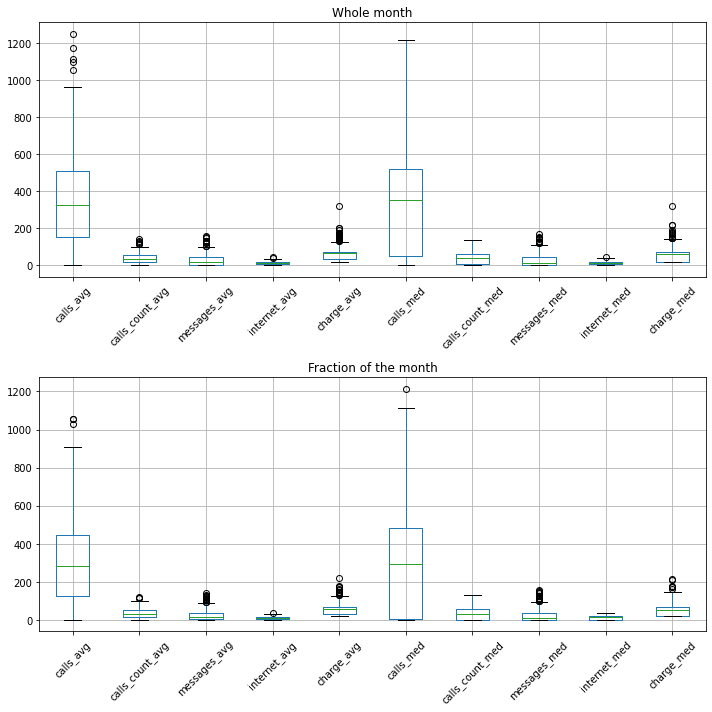

In [118]:
# Calculemos el boxplot para days_listed

fig, ax = plt.subplots(2,1, figsize=(10, 10))

df_cost_whole.drop("user_id", axis=1).boxplot(ax=ax.flat[0], rot=45)
df_cost_fraction.drop("user_id", axis=1).boxplot(ax=ax.flat[1], rot=45)

ax[0].set_title("Whole month")
ax[1].set_title("Fraction of the month")

plt.tight_layout()
plt.show()

Podemos notar de las gráficas de bigotes que no se ven una diferencia increíblemente sensible entre los rangos del dataframe completo y el fraccionario. Veamos ahora la información de describe para tener un vistazo cuantitativo de ambas.

In [119]:
print("Whole")
display(
    df_cost_whole.drop("user_id", axis=1).describe()
)

print("-"*20)
print("Fraction")
df_cost_fraction.drop("user_id", axis=1).describe()

Whole


,calls_avg,calls_count_avg,messages_avg,internet_avg,charge_avg,calls_med,calls_count_med,messages_med,internet_med,charge_med
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,347.781105,39.130274,27.502488,13.389459,59.871639,338.974026,38.312771,26.775974,12.926407,55.855952
std,237.062225,26.521057,29.792367,7.629869,33.885111,269.982293,30.343731,32.621359,8.917433,35.964051
min,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,155.625000,17.906250,2.600000,7.714286,32.514091,47.750000,6.000000,0.000000,5.000000,20.330000
50%,326.863636,36.373737,19.818182,13.861111,69.244500,353.000000,40.000000,15.000000,15.000000,62.302500
75%,507.687500,56.285714,42.666667,18.928571,70.000000,522.000000,60.000000,45.750000,19.000000,70.000000
max,1250.000000,140.750000,156.000000,44.000000,320.185000,1217.000000,138.500000,168.500000,44.000000,320.185000


--------------------
Fraction


,calls_avg,calls_count_avg,messages_avg,internet_avg,charge_avg,calls_med,calls_count_med,messages_med,internet_med,charge_med
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,300.937785,33.884934,24.465877,11.644352,54.930128,302.598000,34.259000,24.107000,11.404000,50.678270
std,209.198037,23.342633,26.553242,6.752720,28.885149,259.320175,29.082521,30.606348,8.478358,31.063181
min,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,127.803571,14.702381,2.440476,6.178030,29.561750,2.250000,0.750000,0.000000,1.000000,20.000000
50%,284.750000,31.333333,17.291667,11.763889,56.339333,296.250000,33.000000,12.000000,13.000000,50.000000
75%,443.468750,50.905303,37.500000,16.381250,70.000000,481.500000,55.625000,38.000000,18.000000,70.000000
max,1055.000000,118.222222,143.111111,35.090909,220.123333,1215.000000,131.000000,157.000000,37.000000,214.400000


No se observa una diferencia sustancial entre una u otra tabla: la diferencia suele ser menor al ~10% del promedio en las columnas. En tal caso optaremos por solo trabajar con los valores fraccionarios para evitar hacer doble análisis.

Como comentario adicional: de la tabla superior se aprecia que las columnas para promedio y mediana tampoco difieren mucho (por ejemplo, el cargo mediano y medio tiene estadísticos muy similares). Para este ejercicio optaremos trabajar con los valores del promedio por usuario ya que es más cotidiano este estadístico. Empecemos mostrando de nuevo el describe para tener la media, mediana y varianza de las columnas.

In [120]:
# Definamos nuestro dataset final
df_values = df_cost_fraction.drop(["calls_med", "calls_count_med", "messages_med", "internet_med", "charge_med"], axis=1)
df_values.columns = ["user_id", "city", "plan", "calls", "calls_count", "messages", "internet", "charge"]

# Usemos user_id como index
df_values = df_values.set_index("user_id")

df_values.describe()

,calls,calls_count,messages,internet,charge
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,300.937785,33.884934,24.465877,11.644352,54.930128
std,209.198037,23.342633,26.553242,6.752720,28.885149
min,0.000000,0.000000,0.000000,0.000000,20.000000
25%,127.803571,14.702381,2.440476,6.178030,29.561750
50%,284.750000,31.333333,17.291667,11.763889,56.339333
75%,443.468750,50.905303,37.500000,16.381250,70.000000
max,1055.000000,118.222222,143.111111,35.090909,220.123333


Viendo los datos de la tabla de arriba es claro que los valores estarán bastante dispersos, nótese nada más el caso de `messages` donde la desviación estándar es mayor que la media. Para poder dar más conclusiones hagamos un histograma de las columnas.

### Análisis de los valores

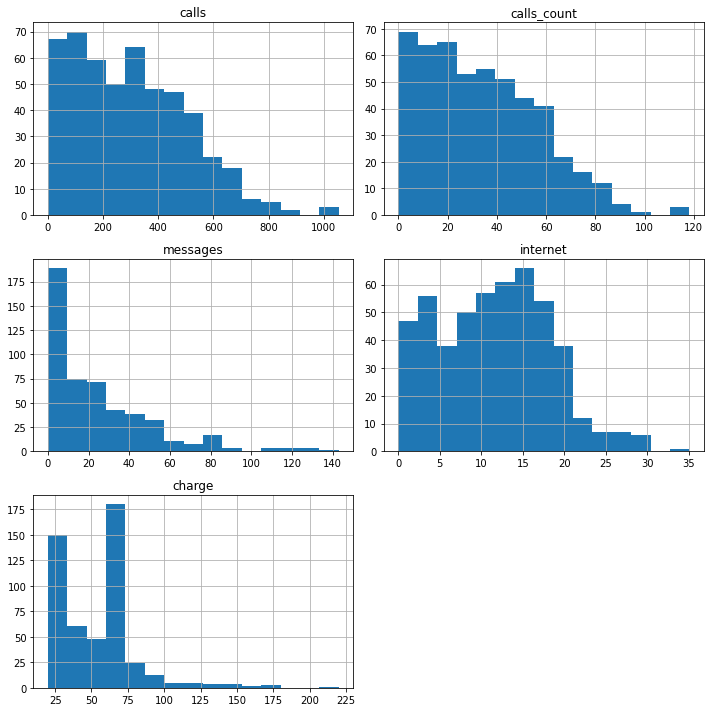

In [121]:
# Histograma que queremos
df_values.hist(bins=15, figsize=(10,10))

plt.tight_layout()
plt.show()

Tenemos bastantes picos, y la distribución no es una normal muy simétrica, pero podemos apreciar que en todas las tablas existe una tendencia descendente (a excepción del internet que es más simétrica). En el caso de charge se ven dos picos y esto es claro: existen dos pisos para el ingreso, los 20/70 dólares de los planes por lo que tenemos estos dos picos; esto nos da a pie a la idea de que podríamos mostrar los histogramas filtrados por el plan del usuario. Haremos esto a continuación.

### Datos por plan de telefonía

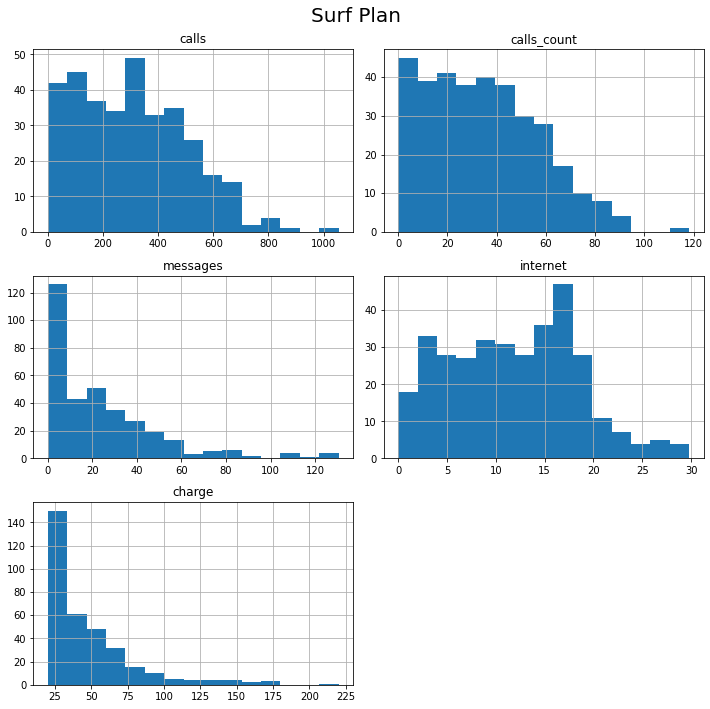

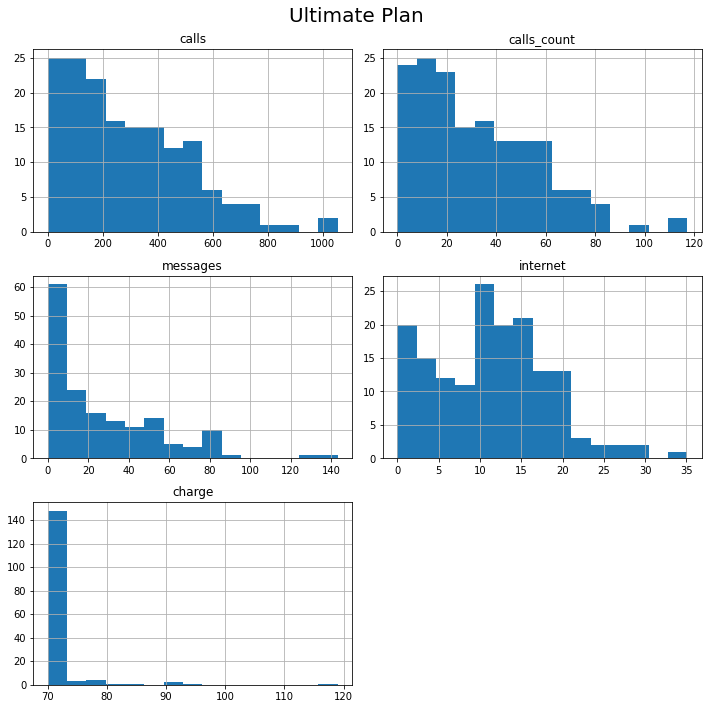

In [122]:
# Histograma que queremos
df_surf = df_values.query("plan == 'surf'")
df_surf.hist(bins=15, figsize=(10,10))

plt.suptitle('Surf Plan', size=20.0)
plt.tight_layout()
plt.show()

df_ultimate = df_values.query("plan == 'ultimate'")
df_ultimate.hist(bins=15, figsize=(10,10))

plt.suptitle('Ultimate Plan', size=20.0)
plt.tight_layout()
plt.show()

Se ven más claras las tendencias en estos histogramas: los usuarios tratan de quedarse siempre antes del consumo del paquete, aunque en el caso del internet es obvio que no lo logran. Es claro que los usuarios del plan _Ultimate_ suelen quedarse cerca del costo normal de su plan, pero los de _Surf_ es muy normal que se pasen: este comportamiento resulta algo curioso pero es notable que aunque muchos usuarios pagan más de los 20 base se quedan menos de los 70 del otro plan, aquí se podría recomendar a la empresa un plan intermedio pero no es el objetivo de este trabajo. Solo para visualizarlo mejor, hagamos un boxplot de los cargos para ambos planes.

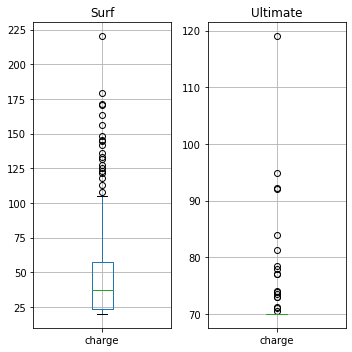

In [123]:
# Calculemos el boxplot para days_listed

fig, ax = plt.subplots(1,2, figsize=(5, 5))

df_surf.boxplot(column= "charge", ax=ax.flat[0])
df_ultimate.boxplot(column= "charge", ax=ax.flat[1])

ax[0].set_title("Surf")
ax[1].set_title("Ultimate")

plt.tight_layout()
plt.show()

Aquí se ve mucho más claro: los usuarios de Surf suelen pasarse pero tratan de quedarse abajo de los 70 del otro plan. En el caso de ultimate lo usual es estar en el costo base, los demás son outliers. Como la segunda hipótesis que tenemos que demostrar es que hay una diferencia por la región New York-New Jersey con las demás, hagamos un procedimiento similar a los pasos anteriores.

### Datos por región: New York-New Jersey y el resto

Una de las hipótesis que se van a probar es si la región de New York-New Jersey tiene un comportamiento diferente al de las demás regiones, para esto mostremos los histogramas seccionado por regiones primero.

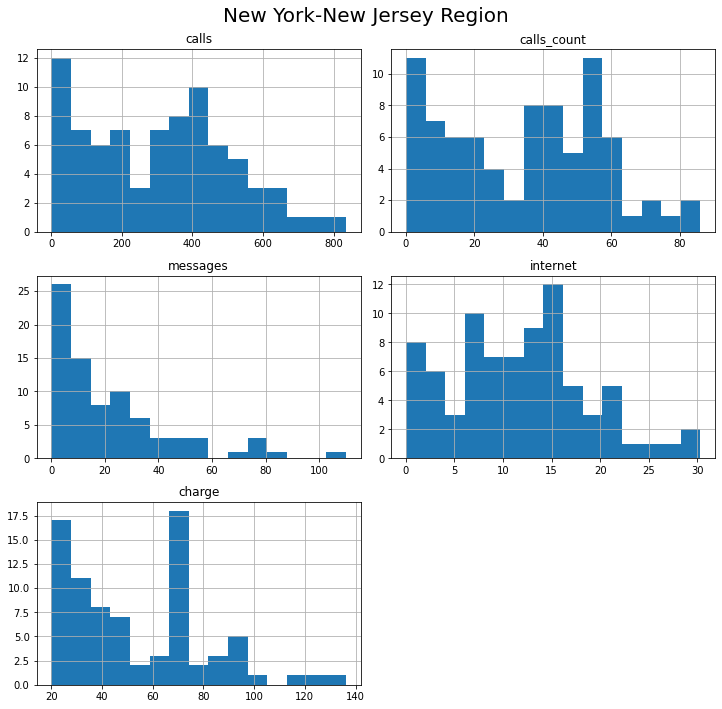

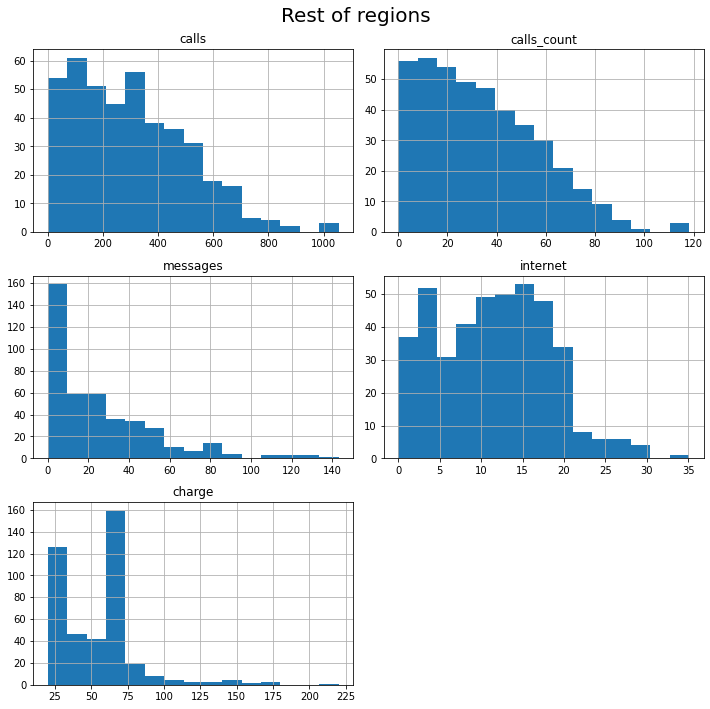

In [124]:
# Histograma que queremos
df_NY_NJ = df_values[df_values.city.str.contains("NY-NJ-PA")]
df_NY_NJ.hist(bins=15, figsize=(10,10))

plt.suptitle('New York-New Jersey Region', size=20.0)
plt.tight_layout()
plt.show()

df_rest = df_values[~df_values.city.str.contains("NY-NJ-PA")]
df_rest.hist(bins=15, figsize=(10,10))

plt.suptitle('Rest of regions', size=20.0)
plt.tight_layout()
plt.show()

# plt.hist(df_NY_NJ.calls, edgecolor='black',color='blue',rwidth=0.9,alpha=0.5, density=True, label="NY-NJ")
# plt.hist(df_rest.calls, edgecolor='black',color='brown',rwidth=0.7,alpha=0.5, density=True, label="The rest")

# plt.legend(loc='upper right')
 
# plt.xlabel('Minutes')
# plt.ylabel('Density')
 
# plt.tight_layout()
 
# plt.show()

Es claro que las distribuciones son diferentes, pero enfocandónos en la parte del ingreso es muy claro que en la región de NY-NJ los valores están más dispersos que en el resto del país. Antes de proceder con la parte estadística, mostremos los boxplots para ambos cargos.

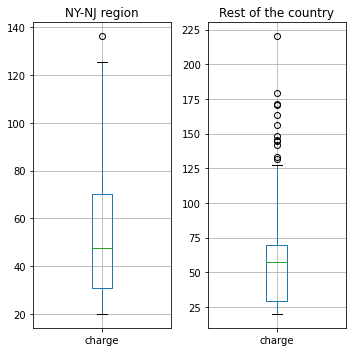

In [125]:
# Calculemos el boxplot
fig, ax = plt.subplots(1,2, figsize=(5, 5))

df_NY_NJ.boxplot(column= "charge", ax=ax.flat[0])
df_rest.boxplot(column= "charge", ax=ax.flat[1])

ax[0].set_title("NY-NJ region")
ax[1].set_title("Rest of the country")

plt.tight_layout()
plt.show()

La mediana se ve bastante similar, aunque los datos están mas dispersos en el resto del país. Mostremos el describe de ambos para tener los estadísticos necesarios y pasemos a trabajar con las hipótesis.

In [126]:
display(df_NY_NJ.describe().charge)

display(df_rest.describe().charge)

count     80.000000
mean      53.642763
std       27.308272
min       20.000000
25%       30.792500
50%       47.650606
75%       70.000000
max      136.204000
Name: charge, dtype: float64

count    420.000000
mean      55.175341
std       29.200571
min       20.000000
25%       29.534875
50%       57.507500
75%       70.000000
max      220.123333
Name: charge, dtype: float64

## Prueba de hipótesis

Tenemos que probar dos hipótesis:
1. Que el ingreso de los usuarios de los planes es diferente
2. Que el ingreso de los usuarios en la zona Nueva York-Nueva Jersey es diferente al de los usuarios de otras zonas

### Ingreso de usuarios por el plan

Si regresamos a la gráfica del boxplot arriba, podemos ver que es bien claro que los ingresos promedio de los dos diferentes planes son distintos, pero comprobemoslo por el uso de estadística.

Definamos la hipótesis nula de que los promedios son iguales para ambas, $H_0: \mu_{surf} = \mu_{ultimate}$; la hipótesis alternativa es $H_1 : \mu_{surf} \neq \mu_{ultimate}$. Establezcamos una tolerancia $\alpha = 0.05$, para un intervalo de confianza de 95%.

In [127]:
# Usemos stat

stat_result_equal = st.ttest_ind(df_surf.charge, df_ultimate.charge, equal_var=False)
alpha = 0.05

print("El valor p es", stat_result_equal.pvalue)

if stat_result_equal.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")


El valor p es 1.204243414500481e-33
Rechazamos la hipótesis nula


Es bastante claro que había que rechazar la hipótesis nula, las medias se notan bastante distintas de la gráfica del boxplot, pero esto refuerza nuestro análisis. Prosigamos con la segunda hipótesis.

### Ingreso por regiones
Definamos la hipótesis nula de que los promedios son iguales para ambas segmentaciones por región, $H_0 : \mu_{NY-NJ} = \mu_{rest}$. La hipótesis alternativa es $H_1 : \mu_{NY-NJ} \neq \mu_{rest}$. Con una tolerancia de $\alpha$=0.05 hacemos el cálculo.

In [128]:
# Usemos stat

stat_result_region = st.ttest_ind(df_NY_NJ.charge, df_rest.charge, equal_var=False)
alpha = 0.05

print("El valor p es", stat_result_region.pvalue)

if stat_result_region.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")


El valor p es 0.6500519283953499
No rechazamos la hipótesis nula


Interesante: aunque del boxplot pudimos haber declarado que la cosa no se definía bien el p-valor es una señal de que si puede ser, las medias si deben ser iguales; no hay diferencia significativa en el ingreso por región del país.

## Conclusion

Hemos ordenado y enriquecido nuestro set de datos, trabajando con las llamdas, mensajes y datos de internet mensuales para los usuarios de varias ciudades y planes. Tras realizar gráficas para estudiar el comportamiento de como se distribuyen y utilizar herramientas estadísticas concluimos que los usuarios de los dos planes no tienen la misma media y que no es un factor indicador la región en donde esta el usuario.